In [2]:
import cv2
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from skimage import morphology, measure
from imutils import contours
import math
import os
from PIL import Image
import PIL.ImageOps


#pipeline = keras_ocr.pipeline.Pipeline()

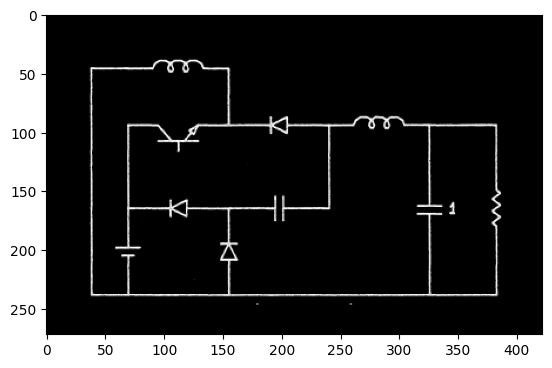

In [14]:
# def midpoint(x1, y1, x2, y2):
#     x_mid = int((x1 + x2)/2)
#     y_mid = int((y1 + y2)/2)
#     return (x_mid, y_mid)

# def inpaint_text(img_path, pipeline):
#     # read image
#     img = keras_ocr.tools.read(img_path)
#     # generate (word, box) tuples 
#     prediction_groups = pipeline.recognize([img])
#     mask = np.zeros(img.shape[:2], dtype="uint8")
#     for box in prediction_groups[0]:
#         x0, y0 = box[1][0]
#         x1, y1 = box[1][1] 
#         x2, y2 = box[1][2]
#         x3, y3 = box[1][3] 
        
#         x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
#         x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
#         thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
#         cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
#         thickness)
#         img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
#     return(img)

IMG_PATH = "schematic/"
images  = [f for f in os.listdir(IMG_PATH) if os.path.isfile(os.path.join(IMG_PATH, f))]
iimage = np.random.randint(95, size=1)

leimg = IMG_PATH+images[iimage[0]]
#leimg = IMG_PATH+"test.PNG"
original = cv2.imread(leimg)
h1, w1, c1 = original.shape
plt.imshow(original)

image = Image.open(leimg)
old_size = image.size
new_size = (w1+50, h1+50)
new_im = Image.new("RGB", new_size, "White")
box = tuple((n - o) // 2 for n, o in zip(new_size, old_size))
new_im.paste(image, box)
original = new_im
inverted_image = PIL.ImageOps.invert(original)
plt.imshow(inverted_image)
#cleaned_img = inpaint_text(leimg, pipeline)

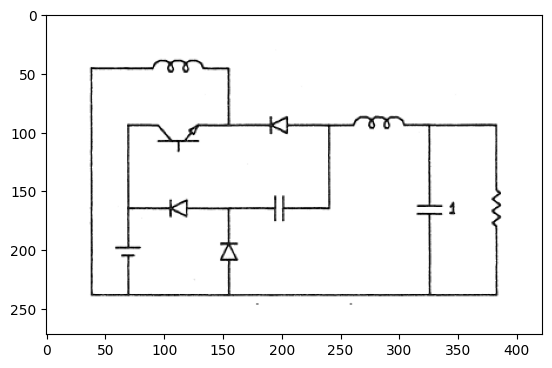

In [15]:
cleaned_img = np.array(original)
cleaned_img2 = np.array(inverted_image)
plt.imshow(cleaned_img)

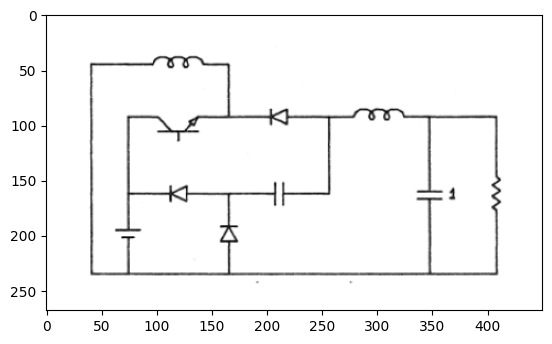

In [16]:
cleaned_img = cv2.resize(cleaned_img, (450, (int)((h1/w1)*450)))
plt.imshow(cleaned_img)

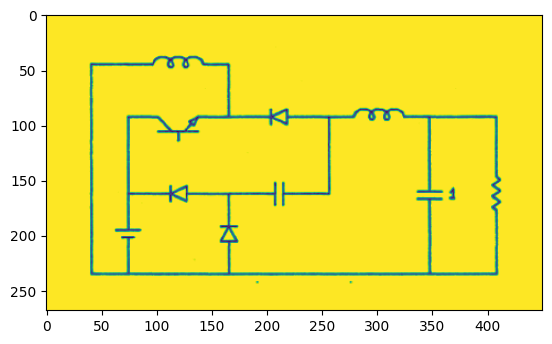

In [17]:
gray = cv2.cvtColor(cleaned_img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

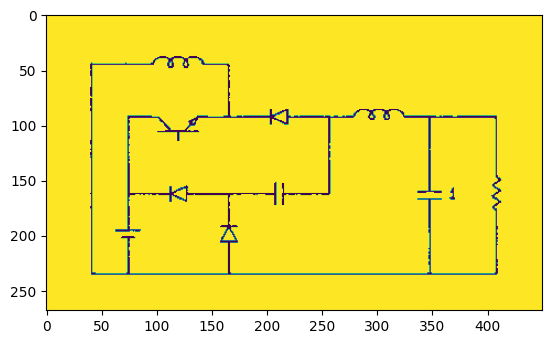

In [18]:
pre = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)[1] #85
plt.imshow(pre)

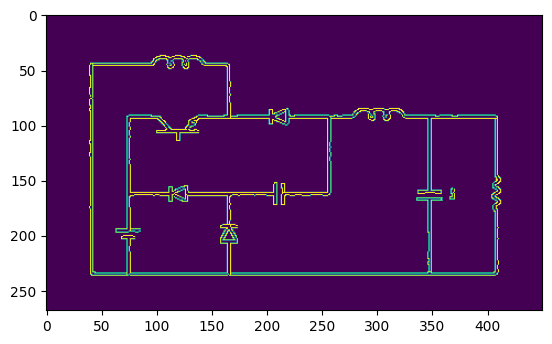

In [19]:
edges = cv2.Canny(pre,50, 50,apertureSize = 5)
plt.imshow(edges)

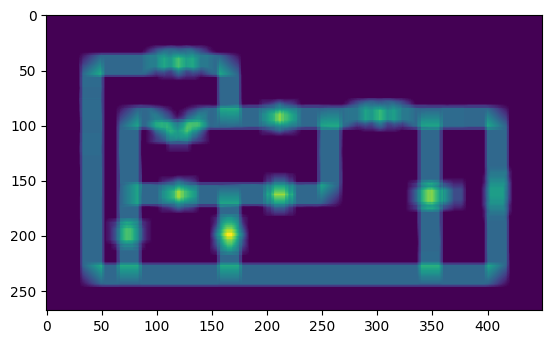

In [20]:
blurImg = cv2.blur(edges,(20,20)) #25, 25
plt.imshow(blurImg)


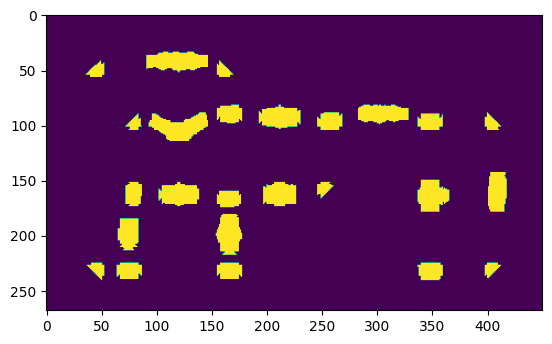

In [21]:
thresh = cv2.threshold(blurImg, 30, 255, cv2.THRESH_BINARY)[1] #30
plt.imshow(thresh)

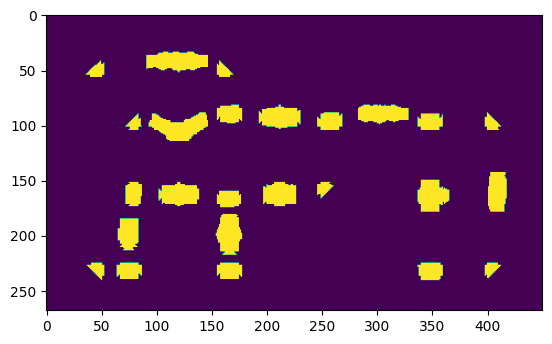

In [22]:
# thresheroded = cv2.erode(thresh, None, iterations=3)
# threshfinal = cv2.dilate(thresheroded, None, iterations=2)


# threshdilated = cv2.dilate(thresh, None, iterations=3)
# threshfinal = cv2.erode(threshdilated, None, iterations=1)
threshfinal=thresh
plt.imshow(threshfinal)

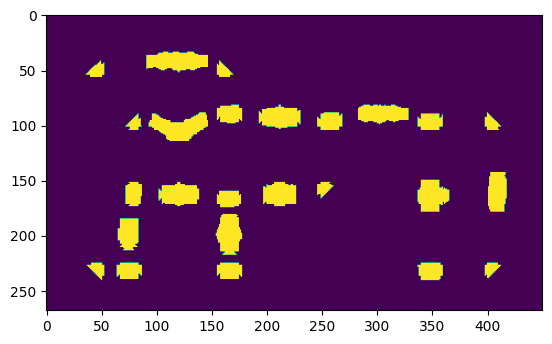

In [23]:
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(threshfinal, background = 0)
mask = np.zeros(threshfinal.shape, dtype="uint8")
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(threshfinal.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 100:
		mask = cv2.add(mask, labelMask)

plt.imshow(mask)

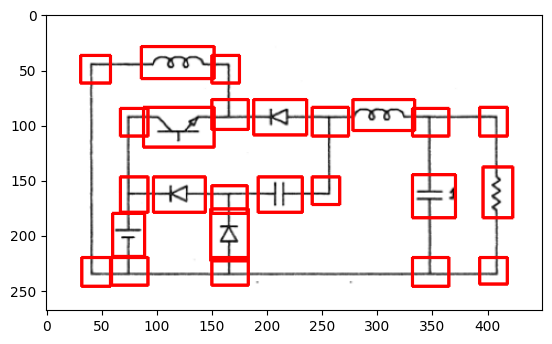

In [24]:
import imutils
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
# loop over the contours
# ((cX, cY), radius) = cv2.minEnclosingCircle(c)
# cv2.circle(cleaned_img, (int(cX), int(cY)), int(radius),
# 	(0, 0, 255), 3)
# show the output image
for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(cleaned_img, (x-5, y-5), (x+w+5, y+h+5), color = (255, 0, 0), thickness = 2)
plt.imshow(cleaned_img)